In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df=pd.read_csv("/CSVForDate.csv",usecols=[1])
df=df.dropna()
df

,Open
2-January-1992,529.22
3-January-1992,538.68
6-January-1992,537.85
7-January-1992,526.11
8-January-1992,523.67
...,...
26-September-2022,17655.60
27-September-2022,17539.22
28-September-2022,17359.93
29-September-2022,17458.45


In [ ]:
values=np.array(df.iloc[:,0],dtype="float32")
print(values)

[  529.22   538.68   537.85 ... 17359.93 17458.45 17254.86]


In [ ]:
train_size=int(values.shape[0]*0.70)
train=values[:train_size]
train

array([ 529.22,  538.68,  537.85, ..., 5304.32, 5391.45, 5470.19],
      dtype=float32)

In [ ]:
test=values[train_size:]
test

array([ 5561.13,  5358.78,  5526.31, ..., 17359.93, 17458.45, 17254.86],
      dtype=float32)

In [ ]:
train=np.reshape(train,(train.shape[0],1))
test=np.reshape(test,(test.shape[0],1))

In [ ]:
from sklearn import preprocessing
slr=preprocessing.StandardScaler()
slr.fit_transform(train)
train=slr.transform(train)
test=slr.transform(test)

In [ ]:
def f(data,look_back):
  x,y=[],[]
  k=look_back
  for i in range(len(data)-look_back):
    y.append(data[i+k][0])
    x.append(data[i:i+k])
  x=np.array(x)
  y=np.array(y)
  return x,y

In [ ]:
x_train,y_train=f(train,1434)
x_test,y_test=f(test,1434)


In [ ]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(3803, 1434, 1) (3803,) (811, 1434, 1) (811,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense,SimpleRNN,LSTM,Dropout

In [ ]:
model=Sequential()
model.add(LSTM(128,input_shape=(1434,1)))
model.add(Dropout(0.2))
model.add(Dense(64,activation="relu"))
model.add(Dense(1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 128)               66560     
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 74,881
Trainable params: 74,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:

model.fit(x_train, y_train, epochs=10, batch_size = 1)

Epoch 1/10
3803/3803 [==============================] - 1128s 296ms/step - loss: 0.0118
Epoch 2/10
3803/3803 [==============================] - 1099s 289ms/step - loss: 0.0073
Epoch 3/10
3803/3803 [==============================] - 1084s 285ms/step - loss: 0.0062
Epoch 4/10
3803/3803 [==============================] - 1102s 290ms/step - loss: 0.0057
Epoch 5/10
3803/3803 [==============================] - 1101s 290ms/step - loss: 0.0050
Epoch 6/10
3803/3803 [==============================] - 1094s 288ms/step - loss: 0.0045
Epoch 7/10
3803/3803 [==============================] - 1094s 288ms/step - loss: 0.0040
Epoch 8/10
3803/3803 [==============================] - 1152s 303ms/step - loss: 0.0038
Epoch 9/10
3803/3803 [==============================] - 1177s 310ms/step - loss: 0.0051
Epoch 10/10
3803/3803 [==============================] - 1203s 316ms/step - loss: 0.0032


In [ ]:

y_pre=model.predict(x_test)
y_pre_train=model.predict(x_train)
y_pre=slr.inverse_transform(y_pre).ravel()
y_pre_train=slr.inverse_transform(y_pre_train).ravel()
y_train=np.reshape(y_train,(y_train.shape[0],1))
y_test=np.reshape(y_test,(y_test.shape[0],1))
y_train=slr.inverse_transform(y_train).ravel()
y_test=slr.inverse_transform(y_test).ravel()

119/119 [==============================] - 78s 656ms/step


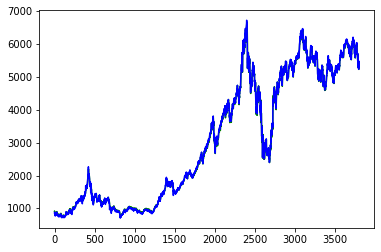

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_pre_train,c="g")
plt.plot(y_train,c="b")
plt.show()

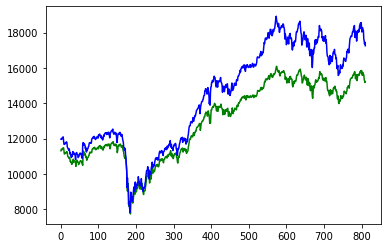

In [ ]:
plt.plot(y_pre,c="g")
plt.plot(y_test,c="b")
plt.show()

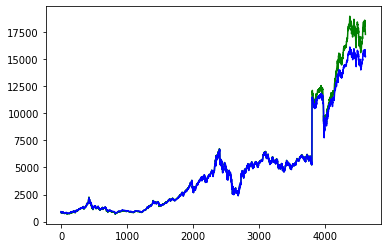

In [ ]:
combinedPredicted = np.concatenate((y_pre_train, y_pre))
combinedTrue = np.concatenate((y_train, y_test))
plt.plot(combinedTrue, c = 'g')
plt.plot(combinedPredicted, c = 'b')
plt.show()